In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
#load the dataset
df=pd.read_csv("C:\\Users\\Admin\\Downloads\\scores_data.csv")

#display 1st 5 rows
df.head()

,Batch,User_ID,Score
0,AI_ELITE_7,uid_149,6 / 7
1,AI_ELITE_7,uid_148,6 / 7
2,AI_ELITE_7,uid_147,7 / 7
3,AI_ELITE_7,uid_146,7 / 7
4,AI_ELITE_7,uid_145,4 / 7


In [17]:
#check shape(rows,columns)
df.shape

#check column names and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Batch        149 non-null    object
 1   User_ID      149 non-null    object
 2      Score     149 non-null    object
dtypes: object(3)
memory usage: 3.6+ KB


In [19]:
#check for mising values
df.isnull().sum()

Batch          0
User_ID        0
   Score       0
dtype: int64

In [21]:
print(df.columns)

Index(['Batch ', 'User_ID ', '   Score   '], dtype='object')


In [23]:
df.columns=df.columns.str.strip()

In [25]:
print(df.columns)


Index(['Batch', 'User_ID', 'Score'], dtype='object')


In [31]:
df['Score']=df['Score'].astype(str)

#extract 1st numeric value from the string
df['Score']=df['Score'].str.extract(r'(\d+)')

#convert to numeric
df['Score']=pd.to_numeric(df['Score'],errors='coerce')

In [33]:
df['Score'].describe()

count    149.000000
mean       4.382550
std        1.592199
min        0.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        7.000000
Name: Score, dtype: float64

In [37]:
#unique batches
df['Batch'].unique()

array(['AI_ELITE_7', 'AI_ELITE_6', 'AI_ELITE_4'], dtype=object)

In [41]:
#check if user id is unique
df['User_ID'].nunique()==len(df)

True

In [43]:
#Group by batch
batch_groups=df.groupby('Batch')

#view grouped data
batch_groups.size()

Batch
AI_ELITE_4    48
AI_ELITE_6    48
AI_ELITE_7    53
dtype: int64

In [45]:
batch_stats=df.groupby('Batch')['Score'].describe()
batch_stats

,count,mean,std,min,25%,50%,75%,max
Batch,,,,,,,,
AI_ELITE_4,48.0,3.791667,1.443376,0.0,3.0,4.0,4.25,7.0
AI_ELITE_6,48.0,4.229167,1.640441,0.0,3.0,4.0,5.00,7.0
AI_ELITE_7,53.0,5.056604,1.446682,2.0,4.0,5.0,6.00,7.0


In [49]:
#mean score per batch
mean_score=df.groupby('Batch')['Score'].mean()
mean_score

Batch
AI_ELITE_4    3.791667
AI_ELITE_6    4.229167
AI_ELITE_7    5.056604
Name: Score, dtype: float64

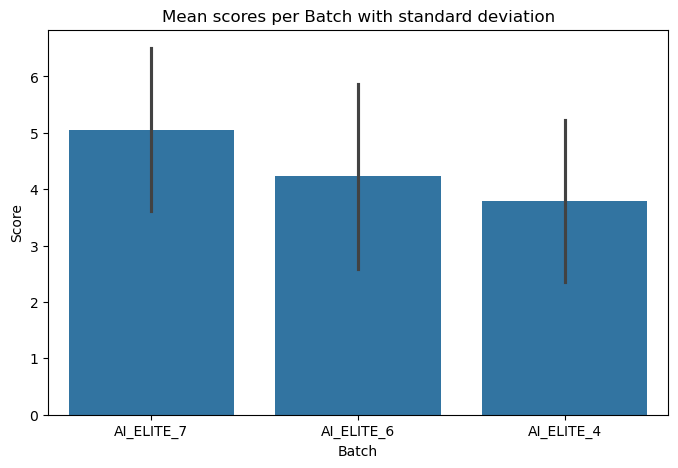

In [51]:
plt.figure(figsize=(8,5))
sns.barplot(
    x='Batch',
    y='Score',
    data=df,
    errorbar='sd'
)
plt.title("Mean scores per Batch with standard deviation")
plt.show()

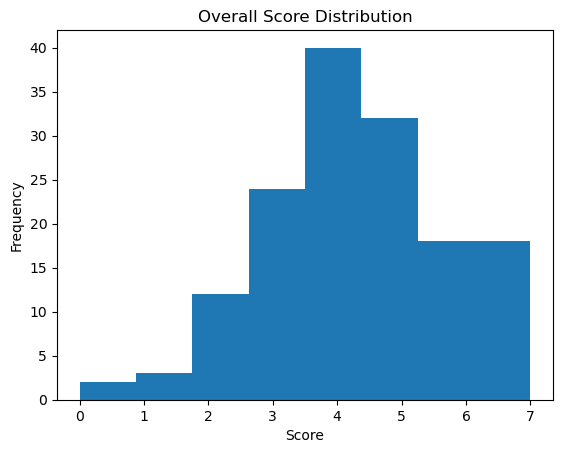

In [53]:
#Score Distribution
plt.figure()
plt.hist(df["Score"],bins=8)
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.title ("Overall Score Distribution")
plt.show()

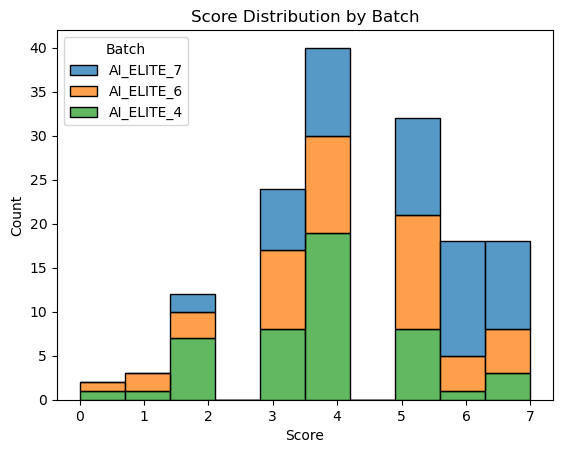

In [55]:
#Score Distribution by batch 
plt.figure()
sns.histplot(data=df, x='Score',hue='Batch',multiple='stack')
plt.title("Score Distribution by Batch")
plt.show()

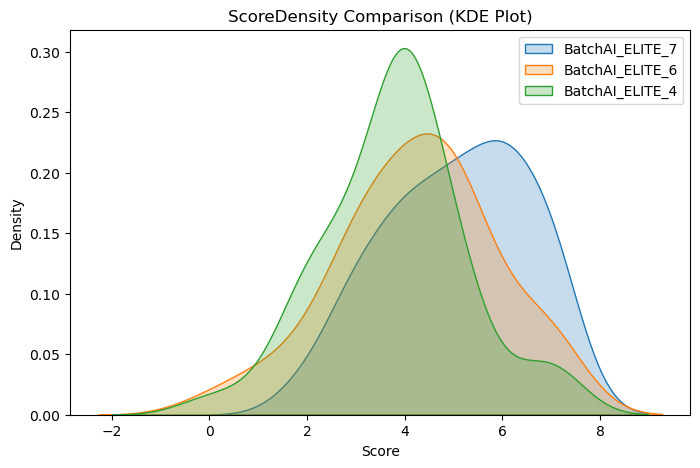

In [73]:
plt.figure(figsize=(8,5))
for batch in df['Batch'].unique():
    sns.kdeplot(
        data=df[df['Batch']==batch]['Score'],
        label=f"Batch{batch}",
        fill=True )
plt.title("ScoreDensity Comparison (KDE Plot)")
plt.xlabel("Score")
plt.ylabel("Density")
plt.legend()
plt.show()

In [83]:
#count of high and low performers
# high performers(score >= 6)

high_performers=df[df['Score']>=6].groupby('Batch').size()
high_performers

Batch
AI_ELITE_4     4
AI_ELITE_6     9
AI_ELITE_7    23
dtype: int64

In [81]:
#low performers (score<=2)
low_performers=df[df['Score']<=2].groupby('Batch').size()
low_performers

Batch
AI_ELITE_4    9
AI_ELITE_6    6
AI_ELITE_7    2
dtype: int64

In [87]:
#Best and weakest batch
best_batch = mean_score.idxmax()
worst_batch = mean_score.idxmin()

best_batch , worst_batch

('AI_ELITE_7', 'AI_ELITE_4')